In [ ]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For displaying images inside the notebook
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv('/content/train.csv')  # Use '/mnt/data/train.csv' if you uploaded elsewhere

# Check the shape of data
print("Shape of dataset:", df.shape)

# Show the first few rows
df.head()


Shape of dataset: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Check how many unique labels (digits)
print("Unique labels (digits):", df['label'].unique())

# Check for any missing values
print("Missing values in dataset:", df.isnull().sum().sum())


Unique labels (digits): [1 0 4 7 3 5 8 9 2 6]
Missing values in dataset: 0


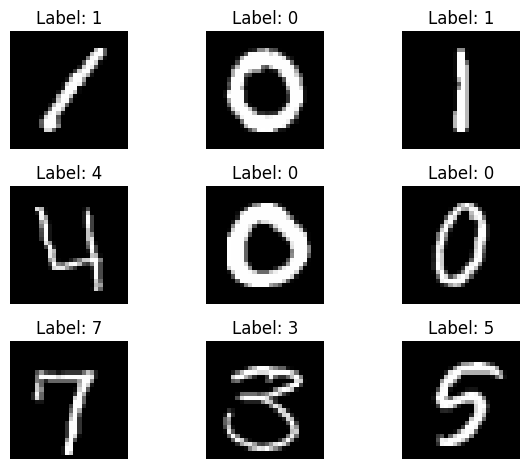

In [ ]:
# Select a sample of digits
for i in range(9):
    image = df.iloc[i, 1:].values.reshape(28, 28)
    label = df.iloc[i, 0]

    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Separate the labels (digits) from the pixel data
X = df.drop('label', axis=1).values
y = df['label'].values

print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)


Shape of X (features): (42000, 784)
Shape of y (labels): (42000,)


In [ ]:
X = X / 255.0  # Normalize pixel values
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (31500, 784)
Test set size: (10500, 784)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the model (might take 2–5 mins)
model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='saga')

In [ ]:
from sklearn.metrics import accuracy_score

# Predict labels for test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 92.12 %


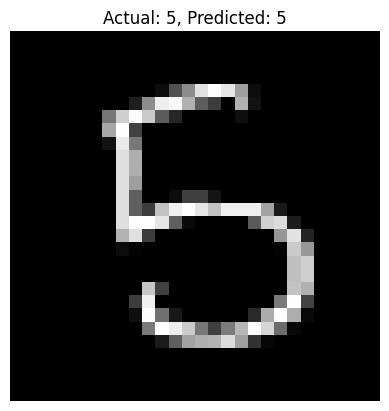

In [ ]:
import random
index = random.randint(0, len(X_test))

# Reshape and plot the digit
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Actual: {y_test[index]}, Predicted: {model.predict([X_test[index]])[0]}")
plt.axis('off')
plt.show()


#CNN has started from Here

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical


In [ ]:
# Reshape input to 28x28x1 (image format)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels (e.g., 3 → [0,0,0,1,0,0,0,0,0,0])
y_train_cnn = to_categorical(y_train, num_classes=10)
y_test_cnn = to_categorical(y_test, num_classes=10)


In [ ]:
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.8044 - loss: 0.6968 - val_accuracy: 0.9613 - val_loss: 0.1216
Epoch 2/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.9725 - loss: 0.0869 - val_accuracy: 0.9759 - val_loss: 0.0803
Epoch 3/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9828 - loss: 0.0535 - val_accuracy: 0.9860 - val_loss: 0.0511
Epoch 4/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9862 - loss: 0.0431 - val_accuracy: 0.9844 - val_loss: 0.0507
Epoch 5/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 42s 102ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9886 - val_loss: 0.0457


In [ ]:
test_loss, test_accuracy = model_cnn.evaluate(X_test_cnn, y_test_cnn)
print("CNN Test Accuracy:", round(test_accuracy * 100, 2), "%")


329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9837 - loss: 0.0508
CNN Test Accuracy: 98.55 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


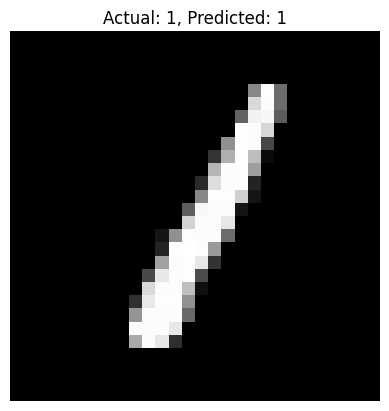

In [ ]:
index = random.randint(0, len(X_test_cnn))
plt.imshow(X_test_cnn[index].reshape(28,28), cmap='gray')
plt.title(f"Actual: {y_test[index]}, Predicted: {model_cnn.predict(X_test_cnn[index].reshape(1,28,28,1)).argmax()}")
plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
model_cnn.fit(datagen.flow(X_train_cnn, y_train_cnn, batch_size=128),
              epochs=10, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


247/247 ━━━━━━━━━━━━━━━━━━━━ 37s 147ms/step - accuracy: 0.9261 - loss: 0.2489 - val_accuracy: 0.9853 - val_loss: 0.0428
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.9667 - loss: 0.1033 - val_accuracy: 0.9846 - val_loss: 0.0465
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - accuracy: 0.9733 - loss: 0.0829 - val_accuracy: 0.9890 - val_loss: 0.0344
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 31s 127ms/step - accuracy: 0.9804 - loss: 0.0640 - val_accuracy: 0.9916 - val_loss: 0.0261
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.9811 - loss: 0.0608 - val_accuracy: 0.9875 - val_loss: 0.0398
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 33s 134ms/step - accuracy: 0.9831 - loss: 0.0539 - val_accuracy: 0.9906 - val_loss: 0.0293
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 32s 129ms/step - accuracy: 0.9825 - loss: 0.0529 - val_accuracy: 0.9909 - val_loss: 0.0283
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - accuracy: 0.9865 - loss: 0.0449 - val

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model_cnn.add(BatchNormalization())

In [ ]:
from PIL import Image
import numpy as np

def preprocess_canvas_image(image):
    # Convert to grayscale
    image = image.convert('L')
    # Resize to 28x28
    image = image.resize((28, 28))
    # Convert to numpy array and normalize
    image_array = np.array(image) / 255.0
    # Reshape for CNN
    image_array = image_array.reshape(1, 28, 28, 1)
    return image_array

In [ ]:
model_cnn.save('digit_recognition_cnn.h5')

In [110]:
# Install Flask and pyngrok
!pip install flask pyngrok

from pyngrok import ngrok, conf
# ngrok.set_auth_token("305EbfDSTwWpUUU4GTFLTl0BvRs_4p2Uk23wXnV61CFpczQaR")
# Install dependencies
# Install dependencies
!pip install flask pyngrok flask-cors

# Import libraries
from flask import Flask, request, jsonify
from flask_cors import CORS
from pyngrok import ngrok, conf
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import threading
import time
from google.colab import userdata

# Load your trained model
try:
    model = load_model('digit_recognition_cnn.h5')
    print("Model loaded successfully")
except Exception as e:
    print("Error loading model:", e)

# Preprocessing function
def preprocess_canvas_image(image):
    try:
        image = image.convert('L')  # Grayscale
        image = image.resize((28, 28))  # Resize to 28x28
        image_array = np.array(image) / 255.0  # Normalize
        image_array = image_array.reshape(1, 28, 28, 1)  # Reshape for CNN
        return image_array
    except Exception as e:
        print("Error preprocessing image:", e)
        return None

# Set ngrok authtoken
try:
    ngrok.set_auth_token(userdata.get("305EbfDSTwWpUUU4GTFLTl0BvRs_4p2Uk23wXnV61CFpczQaR"))  # Use secret
    print("Ngrok authtoken set successfully")
except Exception as e:
    print("Error setting ngrok authtoken:", e)
    # Fallback: Hardcode for testing (remove after setting secret)
    ngrok.set_auth_token("305EbfDSTwWpUUU4GTFLTl0BvRs_4p2Uk23wXnV61CFpczQaR")  # Replace with your authtoken
    print("Using hardcoded authtoken for testing")

# Create Flask app
app = Flask(__name__)
CORS(app)  # Enable CORS

@app.route('/')
def home():
    return "Flask server is running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        file = request.files['image']
        image = Image.open(file)
        image_array = preprocess_canvas_image(image)
        if image_array is None:
            return jsonify({'error': 'Image preprocessing failed'}), 400
        prediction = model.predict(image_array)
        predicted_digit = np.argmax(prediction, axis=1)[0]
        return jsonify({'digit': int(predicted_digit)})
    except Exception as e:
        print("Error during prediction:", e)
        return jsonify({'error': str(e)}), 500

# Start Flask in a separate thread
def run_flask():
    print("Starting Flask server on port 5000...")
    app.run(host='0.0.0.0', port=5001)

# Start ngrok tunnel
try:
    public_url = ngrok.connect(5001).public_url
    print('Public URL:', public_url)
except Exception as e:
    print("Error starting ngrok tunnel:", e)

# Run Flask in a thread and keep the cell alive
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()
print("Flask thread started. Keeping cell alive...")
while True:
    time.sleep(10)  # Keep the cell running to maintain the Flask server

Model loaded successfully
Error setting ngrok authtoken: Secret 305EbfDSTwWpUUU4GTFLTl0BvRs_4p2Uk23wXnV61CFpczQaR does not exist.
Using hardcoded authtoken for testing
Public URL: https://b03d687da698.ngrok-free.app
Starting Flask server on port 5000...
Flask thread started. Keeping cell alive...
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5001 is in use by another program. Either identify and stop that program, or start the server with a different port.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


INFO:werkzeug:127.0.0.1 - - [19/Jul/2025 09:16:15] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


INFO:werkzeug:127.0.0.1 - - [19/Jul/2025 09:16:43] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


INFO:werkzeug:127.0.0.1 - - [19/Jul/2025 09:27:12] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


INFO:werkzeug:127.0.0.1 - - [19/Jul/2025 09:27:17] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


INFO:werkzeug:127.0.0.1 - - [19/Jul/2025 09:27:24] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


INFO:werkzeug:127.0.0.1 - - [19/Jul/2025 09:27:58] "POST /predict HTTP/1.1" 200 -


KeyboardInterrupt: 

In [ ]:
html_code = """
<!DOCTYPE html>
<html>
<head>
    <title>Digit Recognition</title>
    <style>
        canvas { border: 2px solid black; background: black; }
        #prediction { font-size: 24px; margin-top: 10px; }
        button { padding: 10px 20px; margin: 5px; }
        body { display: flex; flex-direction: column; align-items: center; font-family: Arial, sans-serif; }
    </style>
</head>
<body>
    <h1>Draw a Digit</h1>
    <canvas id="canvas" width="280" height="280"></canvas>
    <div>
        <button onclick="clearCanvas()">Clear Canvas</button>
        <button onclick="predictDigit()">Predict</button>
    </div>
    <div id="prediction">Prediction: </div>

    <script>
        const canvas = document.getElementById('canvas');
        const ctx = canvas.getContext('2d');
        let drawing = false;

        // Set up canvas for drawing
        ctx.lineWidth = 15;
        ctx.lineCap = 'round';
        ctx.strokeStyle = 'white';

        // Mouse events
        canvas.addEventListener('mousedown', () => drawing = true);
        canvas.addEventListener('mouseup', () => drawing = false);
        canvas.addEventListener('mousemove', draw);

        // Touch events for mobile support
        canvas.addEventListener('touchstart', (e) => {
            drawing = true;
            e.preventDefault();
        });
        canvas.addEventListener('touchend', () => drawing = false);
        canvas.addEventListener('touchmove', (e) => {
            if (!drawing) return;
            const touch = e.touches[0];
            const rect = canvas.getBoundingClientRect();
            const x = touch.clientX - rect.left;
            const y = touch.clientY - rect.top;
            ctx.beginPath();
            ctx.moveTo(x, y);
            ctx.lineTo(x, y);
            ctx.stroke();
        });

        function draw(event) {
            if (!drawing) return;
            ctx.beginPath();
            ctx.moveTo(event.offsetX, event.offsetY);
            ctx.lineTo(event.offsetX, event.offsetY);
            ctx.stroke();
        }

        function clearCanvas() {
            ctx.fillStyle = 'black';
            ctx.fillRect(0, 0, canvas.width, canvas.height);
            document.getElementById('prediction').innerText = 'Prediction: ';
        }

        async function predictDigit() {
            try {
                // Convert canvas to a PNG blob
                canvas.toBlob(async (blob) => {
                    const formData = new FormData();
                    formData.append('image', blob, 'digit.png');

                    // Send to Flask backend (replace with your ngrok URL)
                    const response = await fetch('https://f0681641e5f3.ngrok-free.app/predict', {
                        method: 'POST',
                        body: formData
                    });

                    if (!response.ok) {
                        throw new Error(`HTTP error! Status: ${response.status}`);
                    }

                    const result = await response.json();
                    if (result.error) {
                        document.getElementById('prediction').innerText = `Error: ${result.error}`;
                    } else {
                        document.getElementById('prediction').innerText = `Prediction: ${result.digit}`;
                    }
                });
            } catch (error) {
                console.error('Prediction error:', error);
                document.getElementById('prediction').innerText = 'Error: Failed to get prediction';
            }
        }
    </script>
</body>
</html>
"""

# Save the HTML file
with open('digit_recognition.html', 'w') as f:
    f.write(html_code)

In [ ]:
from IPython.display import HTML
HTML(html_code)


In [ ]:
from google.colab import files
files.download('digit_recognition.html')